## 豆瓣250数据分析

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
# import matplotlib
import math
import seaborn as sns
# matplotlib中文显示设置对seaborn无效，采用如下方式可行：
# matplotlib.rcParams['font.family']='SimHei' # 修改了全局变量
# matplotlib.rcParams['font.size']=20
#指定默认字体
mp.rcParams['font.sans-serif'] = ['SimHei']
mp.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
mp.rcParams['axes.unicode_minus'] = False
sns.set(font='SimHei')  # 解决Seaborn中文显示问题

### 目标对爬取的top250的豆瓣数据进行分析

In [4]:
df_data = pd.read_csv('douban250.csv')
df_data.describe()

,movie_num,movie_score
count,250.000000,250.000000
mean,125.500000,8.867200
std,72.312977,0.271623
min,1.000000,8.300000
25%,63.250000,8.700000
50%,125.500000,8.800000
75%,187.750000,9.000000
max,250.000000,9.700000


In [3]:
df_data.describe(include=['O'])

,movie_name,movie_director,movie_star,movie_year,movie_country,movie_type,movie_intro,movie_url
count,250,250,237,250,250,250,245,250
unique,250,186,225,55,65,128,245,250
top,哈利·波特与阿兹卡班的囚徒 /Harry Potter and the Prisoner o...,克里斯托弗·诺兰 Christopher Nolan,伊桑·霍克 Ethan Hawke,2004,美国,剧情,Mr. I Don't Care其实也有Care的时候。,https://movie.douban.com/subject/1760622/
freq,1,7,3,14,80,20,1,1


### 单特性分析

In [3]:
def plot_distribution(dataset, cols=3, width=20, height=15, hspace=0.2, wspace=0.5):
    mp.style.use('seaborn-whitegrid')
    fig = mp.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            mp.xticks(rotation=25)
        else:
            #直方图，频数
            g = sns.distplot(dataset[column])
            mp.xticks(rotation=25)

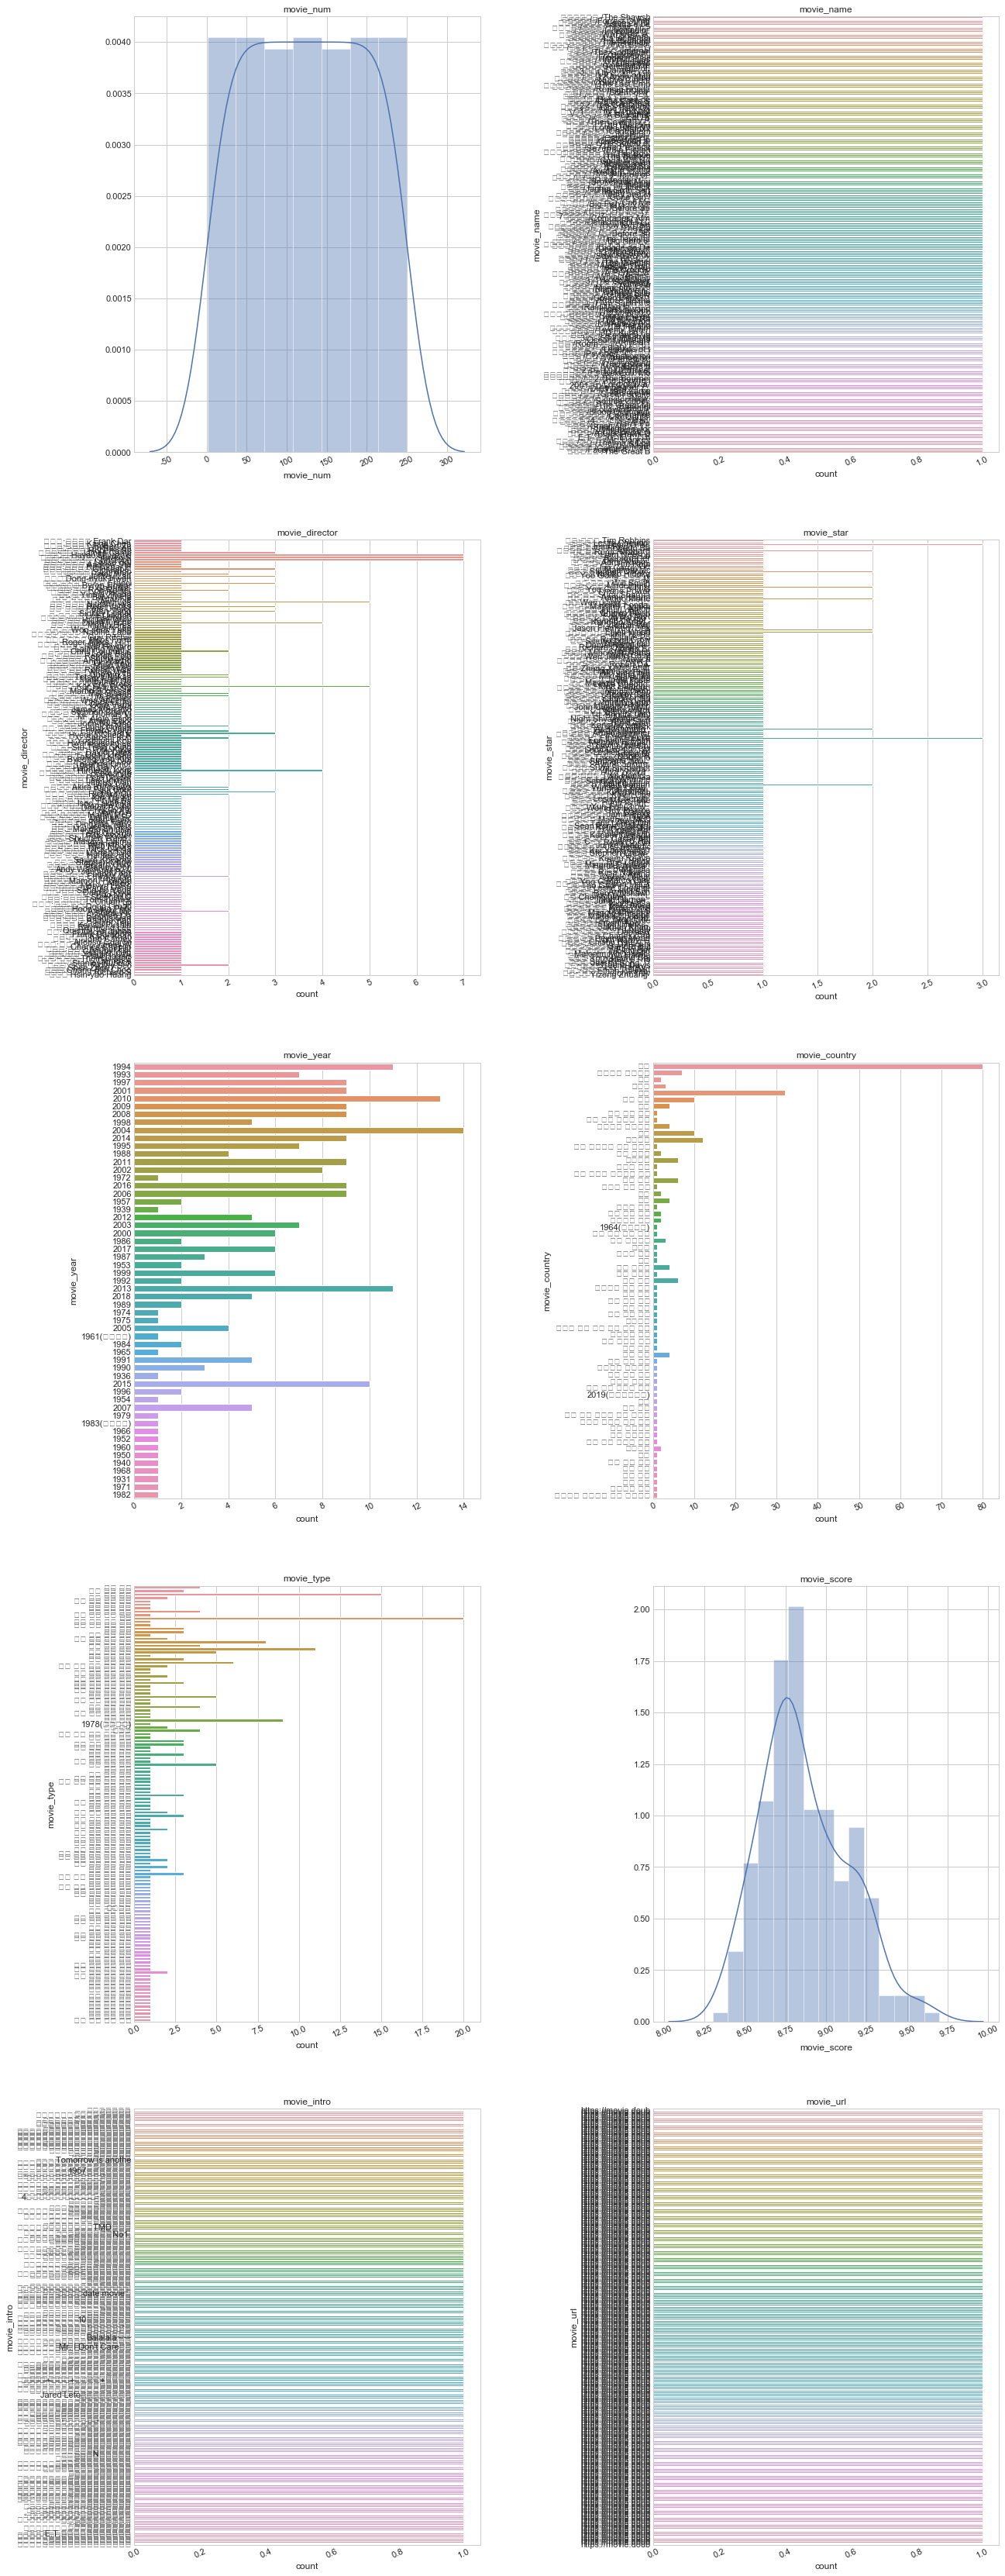

In [7]:
plot_distribution(dataset=df_data,height=60,cols=2)

In [ ]:
### 两个变量分析

In [ ]:
#评分和排名的关系